<a href="https://colab.research.google.com/github/teja-1403/Forage-BCG-X-Data-Science/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

teja098_bcg_x_task2_path = kagglehub.dataset_download('teja098/bcg-x-task2')
teja098_cleandata_path = kagglehub.dataset_download('teja098/cleandata')
teja098_dataforpredictions_path = kagglehub.dataset_download('teja098/dataforpredictions')

print('Data source import complete.')


# **Customer Churn Prediction**

### **1. Import Packages**

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

### **2. Load the Dataset**

In [ ]:
df = pd.read_csv(r"/kaggle/input/dataforpredictions/data_for_predictions.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


----

## **3. Random Forest: Model Training**


----

A random forest is a supervised learning algorithm which means that you must provide the algorithm with a set of features, as well as the outcome that you’re trying to predict, in our case churn.

The way it makes predictions is by building a set of decision trees on different samples of the data and by taking a majority vote to decide what prediction to make.

In [ ]:
train_df = df.copy()

In [ ]:
y = df['churn']  # Dependent Variable
X = df.drop(columns=['id', 'churn'])    # Independent Variable
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


**Why Random Forest:**

- **No Need to Scale:** Unlike some models that rely on distance calculations, the Random Forest uses a rule-based approach, meaning your features don’t need to be scaled.
- **Master of Non-Linearity:** Random Forests excel at handling non-linear parameters, which is often where linear models stumble.
- **Power Hungry:** Training a Random Forest on a large dataset demands significant computational power because you’re building an entire ensemble of models.
- **Time-Intensive:** With great power comes great complexity-the larger the forest, the longer the training time.

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

#### **4. Evaluate the model**

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9030668127053669


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.73      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.82      0.52      0.52      3652
weighted avg       0.89      0.90      0.86      3652



### **5. Hyperparameter Tuning:**

**Hyperparameter tuning** is the process of finding the optimal set of hyperparameters for a machine learning model to improve its performance. Hyperparameters are parameters that are not learned from the data but are set before the training process begins (e.g., the number of trees in a RandomForest, the maximum depth of each tree, etc.).

### How Hyperparameter Tuning is Used in This Code:

1. **Parameter Grid Definition**:
   - A grid of possible hyperparameter values is defined using `param_grid`.
   - Example parameters include `n_estimators` (number of trees), `max_depth` (maximum depth of each tree), `min_samples_split` (minimum samples required to split a node), etc.

2. **GridSearchCV**:
   - `GridSearchCV` is used to perform an exhaustive search over the specified hyperparameter grid.
   - It evaluates every combination of hyperparameters using cross-validation (in this case, 3-fold CV) to determine which combination yields the best performance.

3. **Model Selection**:
   - The `best_estimator_` from `GridSearchCV` is the `RandomForestClassifier` with the best set of hyperparameters.
   - This optimized model is then used to make predictions and evaluate performance.

### Why Hyperparameter Tuning is Used:

- **Improve Model Performance**: By finding the best hyperparameters, the model is better suited to the specific dataset, leading to improved accuracy and generalization.
- **Prevent Overfitting/Underfitting**: Proper tuning can prevent overfitting (model too complex) or underfitting (model too simple), ensuring the model performs well on unseen data.
- **Optimization**: It helps in utilizing the model’s full potential by fine-tuning parameters that directly affect model complexity and performance.

In [ ]:
# Optimize with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Reduced number of trees
    'max_depth': [10, 20],       # Reduced maximum depth
    'min_samples_split': [2, 5], # Reduced number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Reduced number of samples required to be at a leaf node
    'bootstrap': [True]          # Keep only one bootstrap option for simplicity
}


In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

In [ ]:
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))

Optimized Accuracy: 0.9027929901423878
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.74      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.82      0.52      0.52      3652
weighted avg       0.89      0.90      0.86      3652



### **6. Data visualization**

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [ ]:
import pydot
from sklearn.tree import export_graphviz
from graphviz import Source
import os
import subprocess

def plot_decision_tree(model, title, output_file='decision_tree.html'):
    # Check if Graphviz is installed
    try:
        subprocess.run(['dot', '-V'], check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    except (FileNotFoundError, subprocess.CalledProcessError):
        print("Graphviz is not installed or not found in PATH. Please install Graphviz and add it to your PATH.")
        return

    # Export the tree to a dot file
    dot_data = export_graphviz(
        model.estimators_[0],
        out_file=None,
        feature_names=X.columns,
        filled=True,
        rounded=True,
        special_characters=True
    )

    # Create a Source object
    graph = Source(dot_data)

    # Save the graph as PNG
    png_file = 'temp_tree.png'
    graph.render(filename='temp_tree', format='png', cleanup=False)

    # Create HTML content
    html_content = f'''
    <html>
    <body>
    <h1>{title}</h1>
    <img src="{png_file}" alt="Decision Tree">
    </body>
    </html>
    '''

    # Write HTML content to a file
    with open(output_file, 'w') as file:
        file.write(html_content)

    print(f'Decision tree saved to {output_file}. Open this file in your browser to view the tree.')


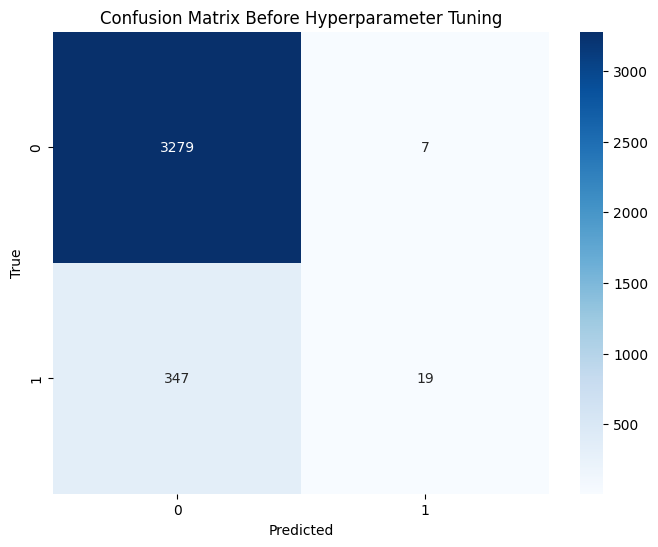

In [ ]:
# Confusion Matrix before hyperparameter tuning
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix Before Hyperparameter Tuning')

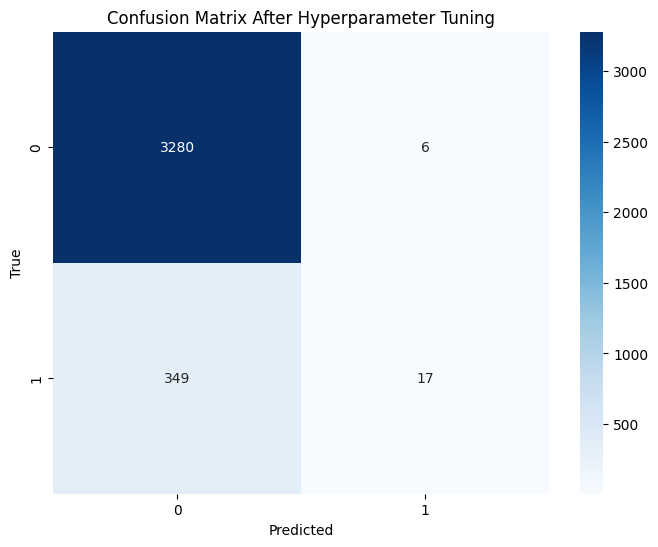

In [ ]:
# Confusion Matrix after hyperparameter tuning
plot_confusion_matrix(y_test, y_pred_best, title='Confusion Matrix After Hyperparameter Tuning')

In [ ]:
plot_decision_tree(model, title='Decision Tree Before Hyperparameter Tuning', output_file='decision_tree_before.html')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.552265 to fit


Decision tree saved to decision_tree_before.html. Open this file in your browser to view the tree.


In [ ]:
plot_decision_tree(best_rf, title='Decision Tree After Hyperparameter Tuning', output_file='decision_tree_after.html')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.609313 to fit


Decision tree saved to decision_tree_after.html. Open this file in your browser to view the tree.


In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

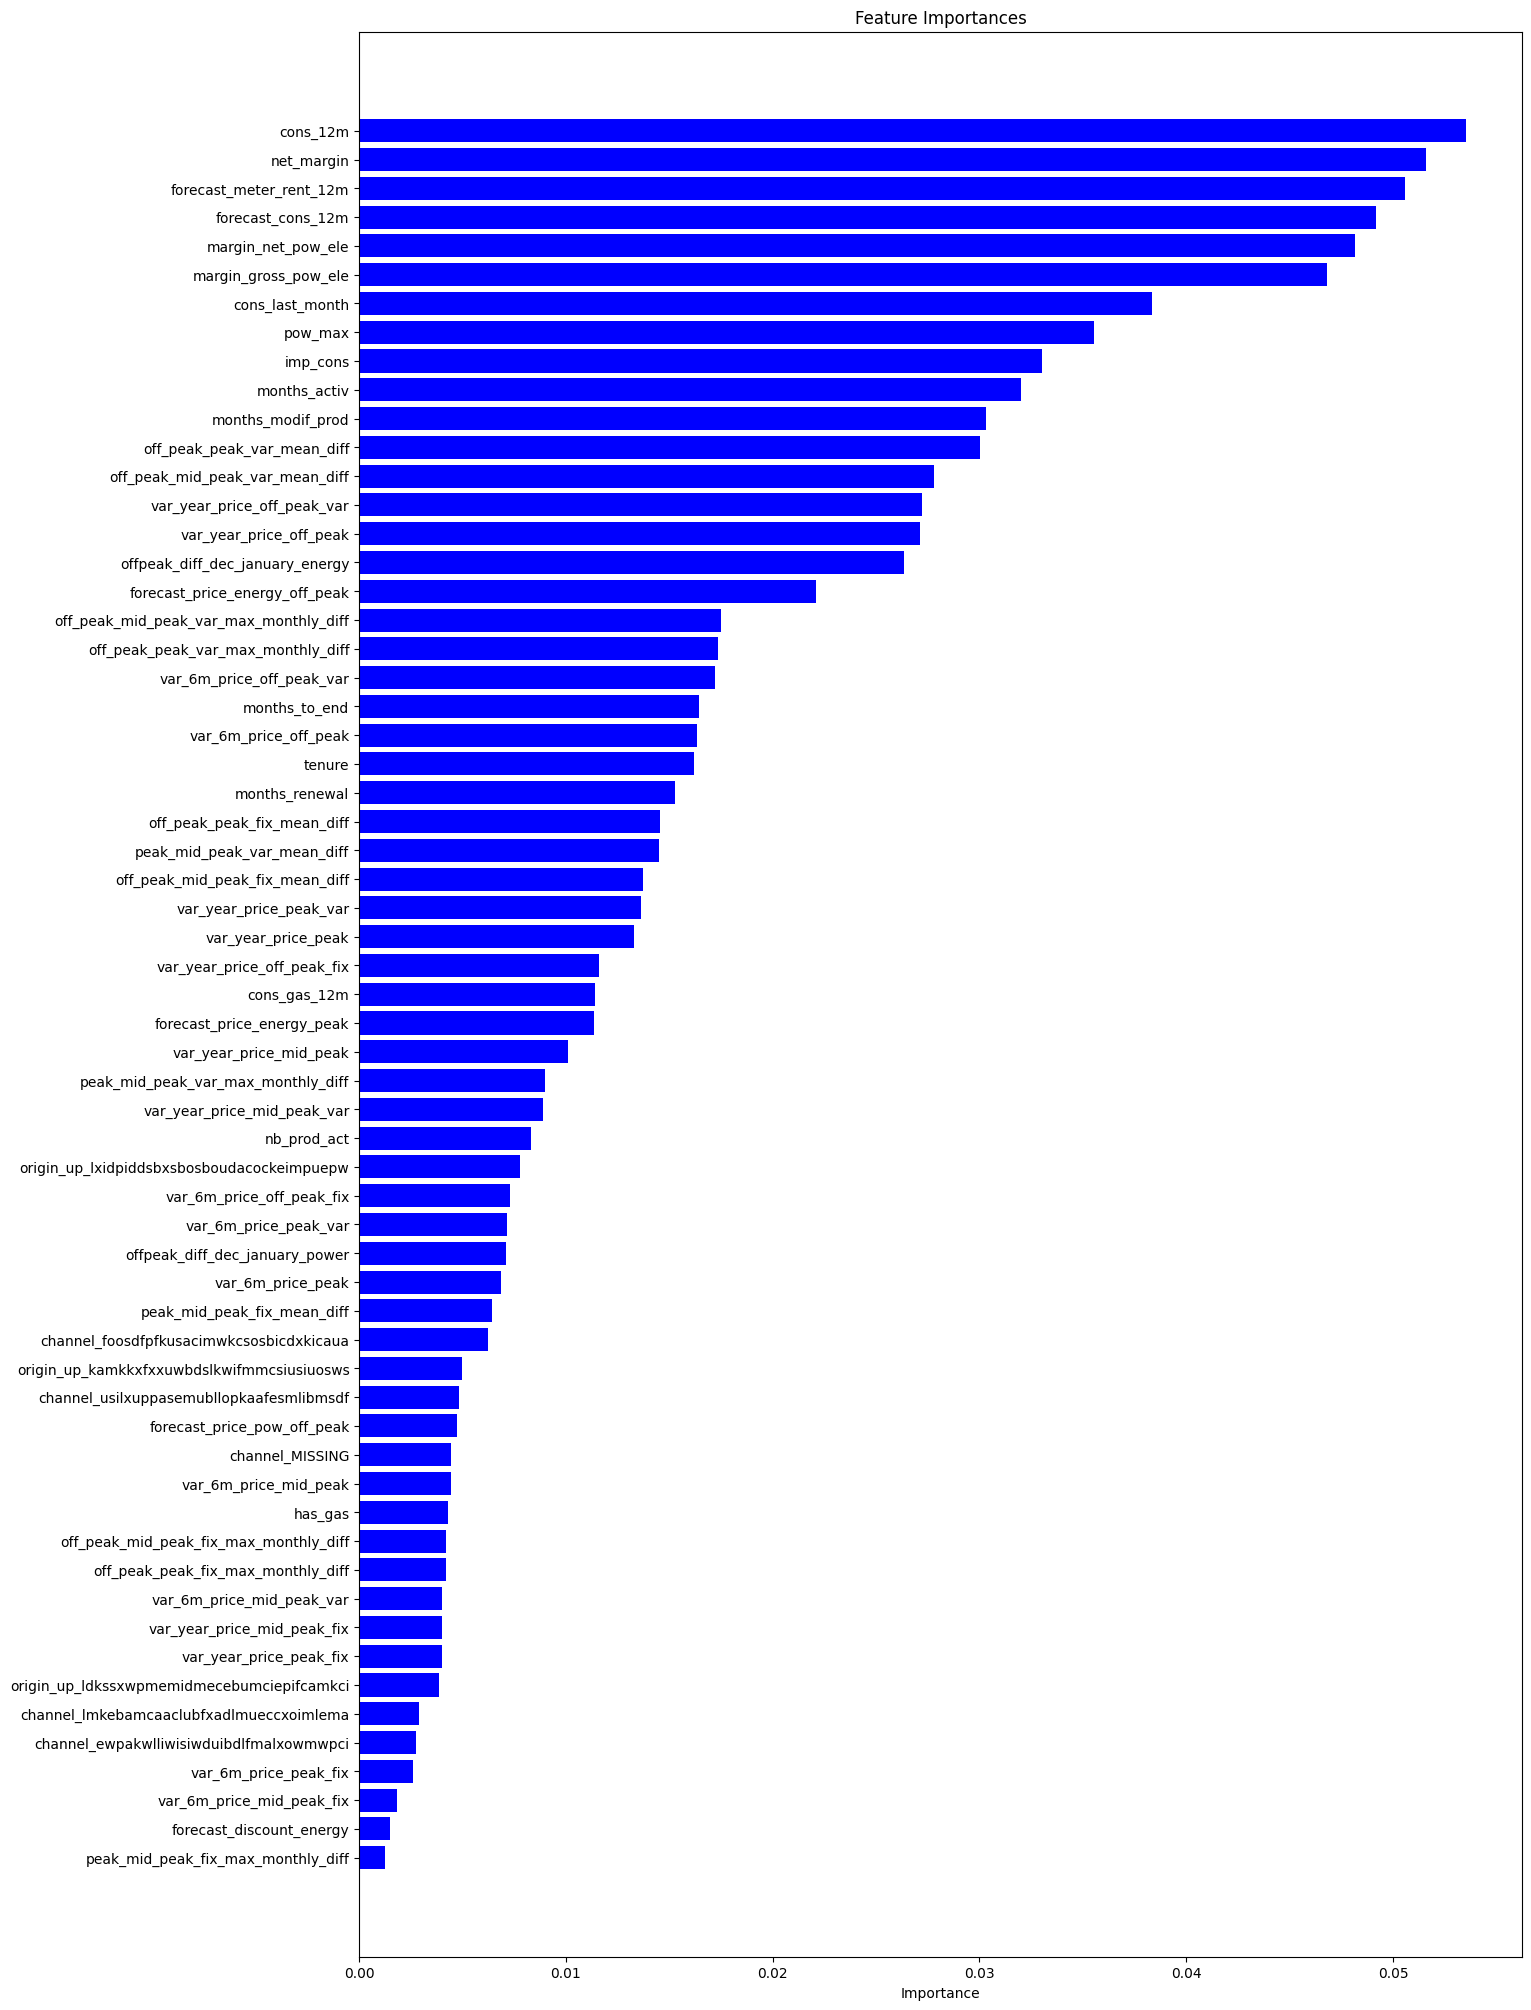

In [ ]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model.
  
- Margin on power subscription also is an influential driver.
  
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract.

- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it.

- Our price sensitivity features are scattered around but are not the main driver for a customer churning.

## **7. Final thoughts**

- **Feature Importance Scores**: Models like Random Forest provide feature importance scores. Features with higher scores contribute more to the model's predictions.
- **Contract Type**: Customers on month-to-month contracts might be more likely to churn compared to those on long-term contracts.
- **Tenure**: Longer-tenured customers might be less likely to churn due to established habits or satisfaction.
- **Monthly Charges**: Higher charges could lead to higher churn if perceived as too costly.
- **Customer Service Calls**: A high number of calls might indicate dissatisfaction, leading to higher churn.

### **Why these features are important**

- **Predictive Power**: These features often show a strong correlation with customer churn based on historical data.
- **Business Relevance**: They provide actionable insights, allowing businesses to target specific areas like contract adjustments or customer service improvements.
